In [1]:
!unzip /content/trade.zip
%ls

Archive:  /content/trade.zip
   creating: archive (10)/
  inflating: archive (10)/georgia-trade-2023.csv  
  inflating: archive (10)/trade_2022.csv  
'archive (10)'/   sample_data/   trade.zip


In [2]:

import pandas as pd
pd.options.display.float_format = '{:.2f}'.format

# Load csv file
path = "/content/archive (10)/georgia-trade-2023.csv"
trade_2023 = pd.read_csv(path)

In [3]:
trade_2023.head()


,Unnamed: 0,Code,Type,Quantity,Quantity_kg,Cost,Month,Year,Country,Category,Name
0,0,70051030000,Import,22466.59,222546.67,33782.52,January,2023,Iran,7005,NaN
1,1,39219090000,Import,58782.40,58782.40,547996.80,January,2023,Türkiye,3921,NaN
2,2,39241000000,Import,10330.41,10330.41,33773.50,January,2023,Türkiye,3924,NaN
3,3,94016900000,Import,50.00,50.00,64.04,January,2023,France,9401,NaN
4,4,83021000009,Import,1150.84,1150.84,13265.36,January,2023,Germany,8302,NaN


In [4]:
trade_2023.drop(columns=trade_2023.columns[0],inplace=True)

In [5]:
trade_2023.head()

,Code,Type,Quantity,Quantity_kg,Cost,Month,Year,Country,Category,Name
0,70051030000,Import,22466.59,222546.67,33782.52,January,2023,Iran,7005,NaN
1,39219090000,Import,58782.40,58782.40,547996.80,January,2023,Türkiye,3921,NaN
2,39241000000,Import,10330.41,10330.41,33773.50,January,2023,Türkiye,3924,NaN
3,94016900000,Import,50.00,50.00,64.04,January,2023,France,9401,NaN
4,83021000009,Import,1150.84,1150.84,13265.36,January,2023,Germany,8302,NaN


In [6]:
trade_2023.describe().astype(int)

,Code,Quantity,Quantity_kg,Cost,Year,Category
count,405756,405756,405756,405756,405756,405756
mean,60976362644,23521,30121,31507,2023,6097
std,26334556078,452395,1229843,387456,0,2633
min,1012100000,-2,-2,0,2023,101
25%,39219090000,8,9,268,2023,3921
50%,64039113000,79,89,1598,2023,6403
75%,84813091000,923,1058,9730,2023,8481
max,99050000002,54376660,315789201,67131806,2023,9905


In [7]:
#renaming Quantity_kg to Weight
trade_2023.rename(columns={'Quantity_kg':'Weight'},inplace=True)
trade_2023.head(1)

,Code,Type,Quantity,Weight,Cost,Month,Year,Country,Category,Name
0,70051030000,Import,22466.59,222546.67,33782.52,January,2023,Iran,7005,NaN


In [8]:
trade_2023.drop(trade_2023[(trade_2023['Weight']<=0)|(trade_2023['Cost']<=0)|(trade_2023['Quantity']<=0)].index,axis=0,inplace=True)

In [9]:
trade_2023.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 405621 entries, 0 to 405755
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Code      405621 non-null  int64  
 1   Type      405621 non-null  object 
 2   Quantity  405621 non-null  float64
 3   Weight    405621 non-null  float64
 4   Cost      405621 non-null  float64
 5   Month     405621 non-null  object 
 6   Year      405621 non-null  int64  
 7   Country   405621 non-null  object 
 8   Category  405621 non-null  int64  
 9   Name      75361 non-null   object 
dtypes: float64(3), int64(3), object(4)
memory usage: 34.0+ MB


In [10]:
trade_2023.isnull().sum()

Code             0
Type             0
Quantity         0
Weight           0
Cost             0
Month            0
Year             0
Country          0
Category         0
Name        330260
dtype: int64

In [11]:
#belowe 2 code concludes that there are no Category which have both Nan value and something
print(trade_2023.drop_duplicates(subset=['Category','Name']).shape[0],
trade_2023.Category.value_counts().shape[0])

1147 1147


In [12]:
#trade_2023.Name.fillna('Not Identified',inplace=True)
trade_2023.Name.value_counts()

Parts and accessories of the motor vehicles                                            7654
Wine                                                                                   5538
furniture and parts                                                                    5036
Lamps and lighting fittings including searchlights and spotlights and parts thereof    3340
Bread, pastry, cakes, biscuits and other bakers' wares                                 2936
                                                                                       ... 
Iron and non-alloy steel in ingots or other primary forms                                28
Copper ores and concentrates                                                             26
Other floating structures (rafts, tanks, coffer-dams, etc.)                              22
Fats and oils and their fractions, of fish or marine mammals                             22
Precious-metal ores and concentrates                                            

In [13]:
impt= trade_2023.loc[trade_2023['Type']=='Import','Cost'].sum()
expt= trade_2023.loc[trade_2023['Type']=='Export','Cost'].sum()

expt-impt
#this shows that Georgia is heavily depended on other countries and does not have stable economy

-7238883916.660412

<class 'matplotlib.axes._axes.Axes'>


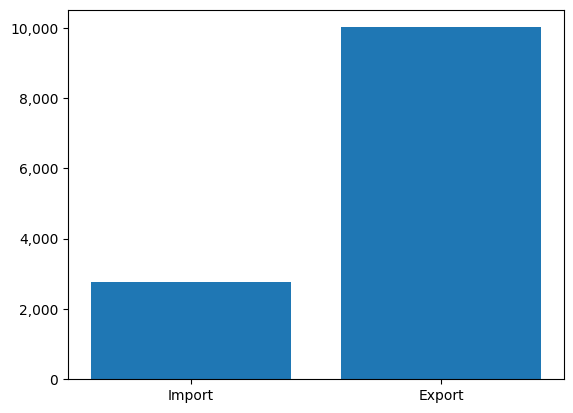

In [38]:
import matplotlib.pyplot as plt

fig,ax= plt.subplots()
print(type(ax))

ax.bar(trade_2023['Type'].unique(),trade_2023.groupby('Type')['Cost'].sum())
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x,p: format(int(x)//1000000, ',')))




In [45]:
trade_2023['Name'].unique()

array([nan, 'Fruit juices', 'Petroleum oils',
       'Parts and accessories of the motor vehicles',
       'Insulated  wire, cable ( coaxial cable and others)\xa0',
       'Lamps and lighting fittings including searchlights and spotlights and parts thereof',
       "Men's or boys' cloths", 'furniture and parts',
       'Ginger, saffron, turmeric and other spices',
       'Other live plants (including their roots), cuttings and slips; mushroom spawn',
       'Polyacetals, other polyethers and epoxide resins',
       "Bread, pastry, cakes, biscuits and other bakers' wares",
       'Beauty/make-up/skincare preparations',
       'Sunflower-seed, safflower or cotton-seed oil\xa0',
       'Automatic data-processing machines',
       'Margarine; edible mixtures or preparations of animal or vegetable fats',
       'Footwear with outer soles of rubber, plastics, leather, etc.',
       'T-shirts (knitted/crocheted)', 'Monitors and projectors',
       'Chocolate and other food preparations contai

<class 'matplotlib.axes._axes.Axes'>


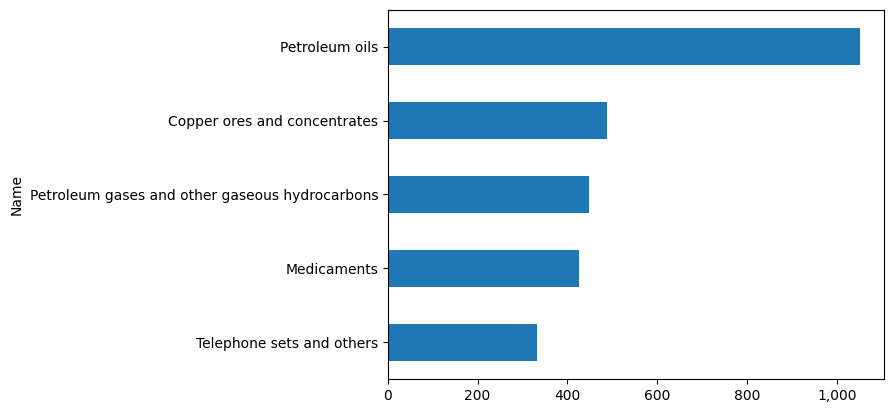

In [47]:
fig,ax= plt.subplots()
print(type(ax))



Name = trade_2023.groupby('Name')['Cost'].sum()
Name.sort_values(ascending=False).head().sort_values().plot.barh(ax=ax)
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x,p: format(int(x)//1000000, ',')))

In [16]:
trade_2023.Month.value_counts()

October      39546
August       39347
November     38859
June         38809
September    38206
March        37969
May          37610
April        36991
July         36877
February     31919
January      29488
Name: Month, dtype: int64

In [17]:
grouped=trade_2023.groupby(['Month','Type'])['Cost'].sum()
for n,i in enumerate(grouped.items()):
  if i[0][1]=='Export':
    i=list(i)
    i[1]=-i[1]
    grouped[n]=i[1]
s =grouped.groupby('Month').sum()
s.index= pd.to_datetime(s.index+'-2023')
s=s.sort_index()
s.index= s.index.month_name()


In [18]:
x = [month for month, b in s.items()]


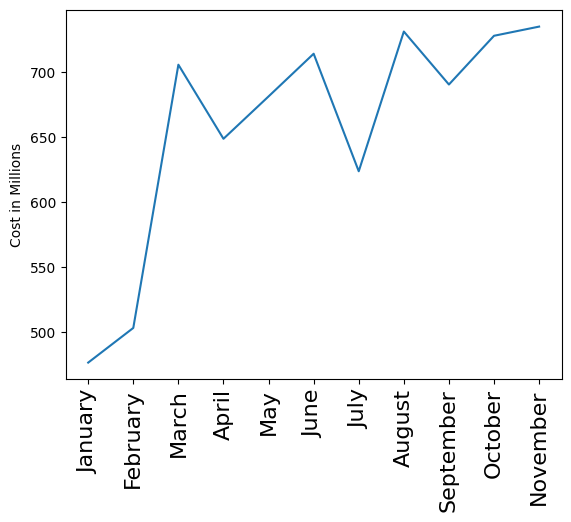

In [19]:
import matplotlib
fig,ax=plt.subplots()

ax.plot(x,s)
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x,p: format(int(x)//1000000, ',')))
plt.xticks(x, rotation='vertical', size=16)
plt.ylabel('Cost in Millions')
plt.show()

<Axes: ylabel='Cost'>

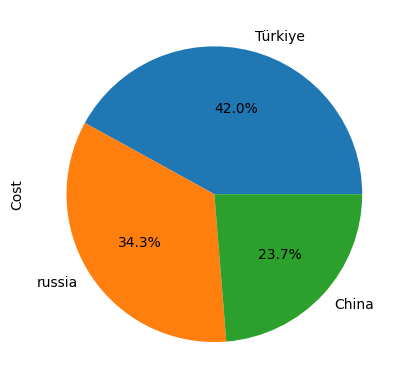

In [20]:
#top 3 countries on which georgia's is depended the most?
trade_2023[trade_2023['Type']=='Import']\
.groupby('Country')['Cost'].sum()\
.sort_values(ascending=False).\
head(3).\
plot.pie( autopct='%1.1f%%')


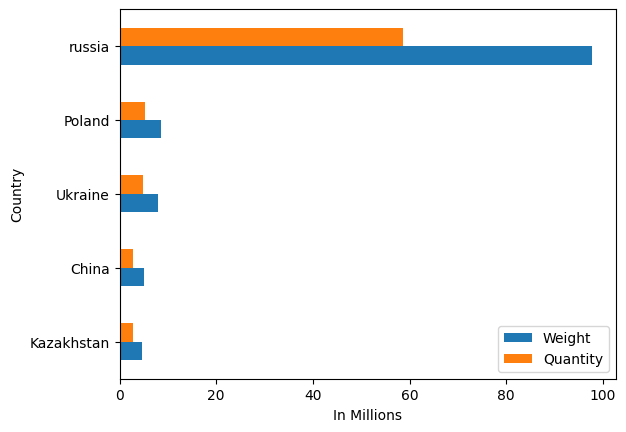

In [21]:

fig, ax = plt.subplots()

trade_2023[(trade_2023['Name']=='Wine')& (trade_2023['Type']=='Export')]\
.groupby('Country')[['Weight','Quantity']].sum()\
.sort_values(by='Weight',ascending=False).head().sort_values(by='Weight').plot.barh(ax=ax)

ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x,p: format(int(x)//1000000, ',')))

ax.set_xlabel('In Millions')
plt.show()

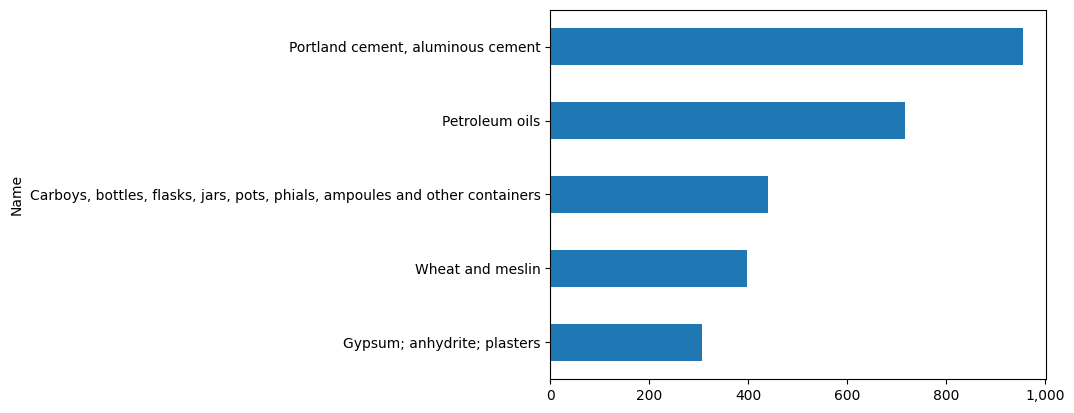

In [49]:
#which are 5 product that georgia needs the most?
fig,ax=plt.subplots()


trade_2023[trade_2023['Type']=='Import'].groupby('Name')['Quantity'].sum().sort_values().tail(5).plot.barh()
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x,p: format(int(x)//1000000, ',')))

In [23]:
#what is most exported and imported proudut Based on Months

df =  trade_2023.groupby(['Type','Month','Name'],as_index=False)[['Type','Month','Quantity','Name']].sum()

x = df['Month'].unique()
y = df['Type'].unique()
top= []
for taip in y:
  for month in x:
    id = df[(df['Month']==month) & (df['Type']==taip)]['Quantity'].idxmax()

    top.append(df.loc[id])

top= pd.DataFrame(top)

<ipython-input-23-cbb57b309bb1>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df =  trade_2023.groupby(['Type','Month','Name'],as_index=False)[['Type','Month','Quantity','Name']].sum()


In [24]:
top['MonthNo']=pd.to_datetime(top['Month']+'-2023')

In [25]:
top= top.sort_values(by='MonthNo').copy()

In [26]:
labels=top[top['Type']=='Export']['Name']
x= range(len(labels))
print(type(labels.tolist()))

<class 'list'>


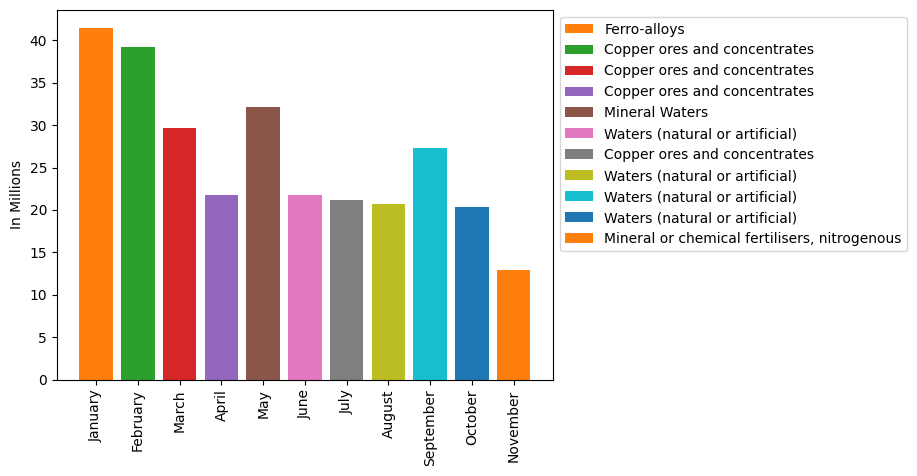

In [27]:
fig,ax=plt.subplots()

ax.bar(data=top[top['Type']=='Export'],x='Month',height='Quantity')

for i in range(len(x)):
    ax.bar(x[i], top[top['Type']=='Export']['Quantity'].tolist()[i], label=labels.tolist()[i])

plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.xticks(x,rotation='vertical')
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x,p: format(int(x)//1000000, ',')))
ax.set_ylabel('In Millions')
plt.show()

In [28]:
labels=top[top['Type']=='Import']['Name']
x= range(len(labels))
print(type(labels.tolist()))

<class 'list'>


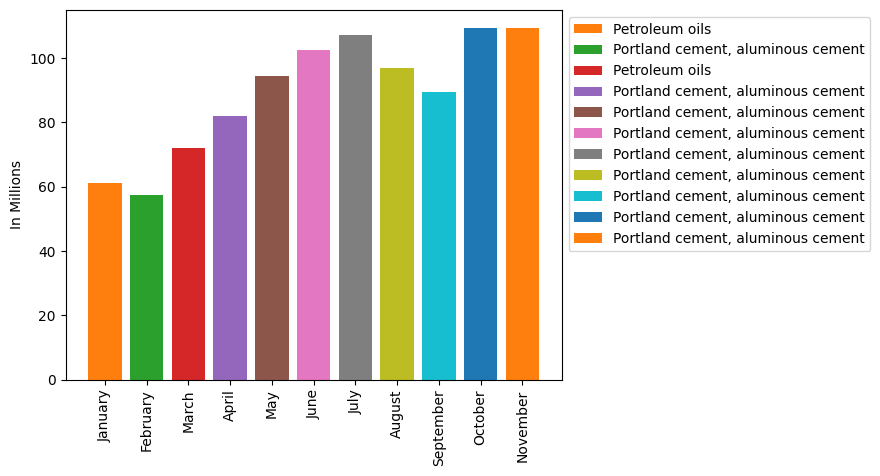

In [29]:
fig,ax=plt.subplots()

ax.bar(data=top[top['Type']=='Import'],x='Month',height='Quantity')

for i in range(len(x)):
    ax.bar(x[i], top[top['Type']=='Import']['Quantity'].tolist()[i], label=labels.tolist()[i])

plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.xticks(x,rotation='vertical')
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x,p: format(int(x)//1000000, ',')))
ax.set_ylabel('In Millions')
plt.show()